In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('Social_Network_Ads.csv')

In [20]:
df.sample(5)

,Age,EstimatedSalary,Purchased
198,26,80000,0
344,47,105000,1
303,37,79000,1
150,26,15000,0
183,33,43000,0


In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(df.drop('Purchased' , axis = 1),
                                                     df['Purchased'] ,
                                                     test_size = 0.3,
                                                    random_state = 0)

In [22]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

In [23]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [24]:
type(X_train)

pandas.core.frame.DataFrame

In [25]:
type(X_train_scaled)

numpy.ndarray

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=X_test.columns)

In [31]:
np.round(X_train.describe() ,1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [32]:

np.round(X_train_scaled.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


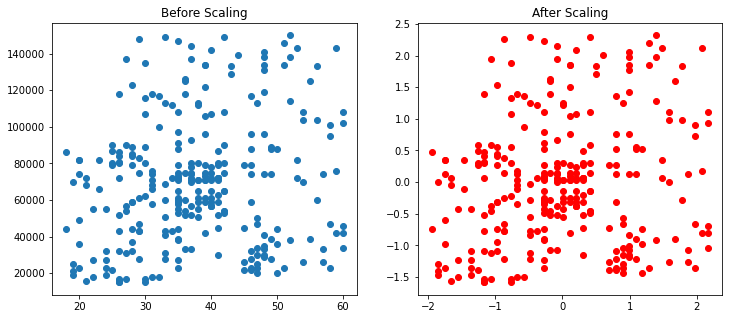

In [35]:
fig , (ax1,ax2 ) = plt.subplots(ncols = 2 ,
                               figsize = (12,5))
x = X_train['Age'] 
y = X_train['EstimatedSalary']
ax1.scatter(x , y)
ax1.set_title("Before Scaling")

a = X_train_scaled['Age']
b =X_train_scaled['EstimatedSalary']
ax2.scatter(a , b , color = 'red')
ax2.set_title("After Scaling")

plt.show()

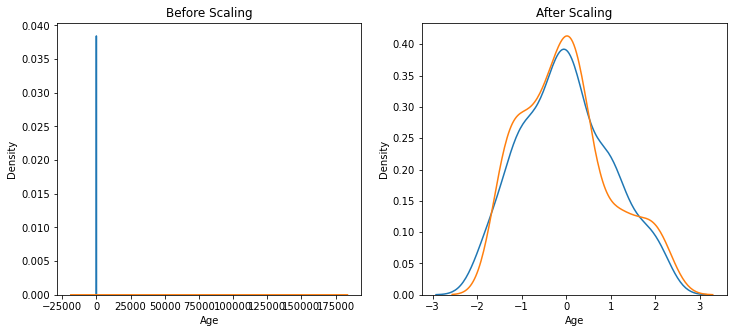

In [41]:
fig , (ax1 , ax2) = plt.subplots(ncols =2 , figsize = (12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x = x ,ax= ax1)
sns.kdeplot(x = y , ax =ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x = a ,ax = ax2)
sns.kdeplot(x = b , ax = ax2)
plt.show()

## Comparison of Distributions

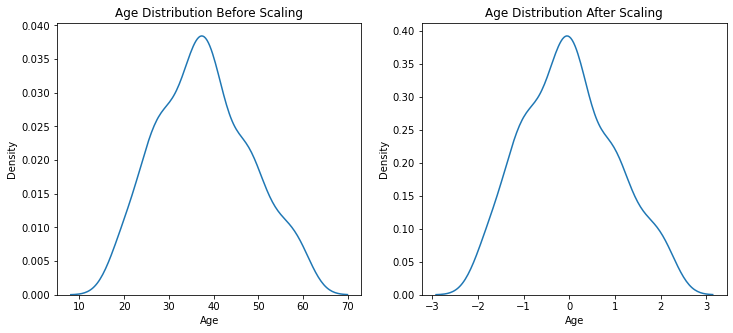

In [42]:
fig ,(ax1,ax2) = plt.subplots(ncols=2 , figsize = (12,5))

# Before Scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(x = x , ax = ax1)


# After Scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(x =a , ax = ax2)
plt.show()

***The distribution is same but look out for scales
in both the plots , so scales will not affect our
distributions and similar goes for Estimated Salary ; only the mean is centered and data spread is squished or expanded accordingly to make std = 1***

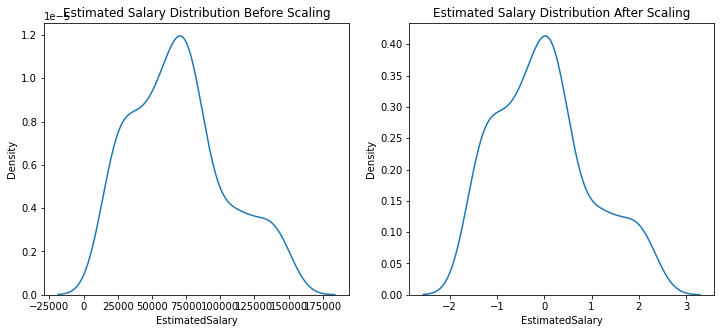

In [43]:
fig ,(ax1,ax2) = plt.subplots(ncols=2 , figsize = (12,5))

# Before Scaling
ax1.set_title("Estimated Salary Distribution Before Scaling")
sns.kdeplot(x = y , ax = ax1)


# After Scaling
ax2.set_title('Estimated Salary Distribution After Scaling')
sns.kdeplot(x =b , ax = ax2)
plt.show()

## Why Scaling is important??

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr =LogisticRegression()
lr_scaled = LogisticRegression()

In [47]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled ,y_train)

LogisticRegression()

In [51]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [52]:
from sklearn.metrics import accuracy_score

In [55]:
print("Actual", accuracy_score(y_test ,y_pred))
print("Scaled" , accuracy_score(y_test , y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


***Now we have seen how scaled data can make the difference ,but there are also some algorithms which doesn't give a shit about scaling data like Decision trees, Let's see this***

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt =DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [59]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled , y_train)

DecisionTreeClassifier()

In [60]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [61]:
print("Actual", accuracy_score(y_test  ,y_pred))
print('Scaled' ,accuracy_score(y_test ,y_pred_scaled))

Actual 0.875
Scaled 0.875


***Strange , right but if we try to comprehend why this happened geometrically, it's because here in decision tree we're not calculating any kind of distances we're just comparing them in laymen terms if I say so. SO where we should apply standardization? We'll see before this see what happens if there are outliers in data, here I'm going to add some after looking into the describe method.***

In [62]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [63]:
df = df.append(pd.DataFrame({"Age": [5,90,95] ,
                             "EstimatedSalary":[1000,25000,35000] ,
                             "Purchased" : [0,1,1]
                            }))

In [68]:
df['Age'].describe()

count    403.000000
mean      37.846154
std       11.255343
min        5.000000
25%       29.500000
50%       37.000000
75%       46.000000
max       95.000000
Name: Age, dtype: float64

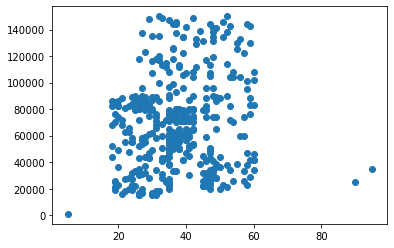

In [70]:
plt.scatter(x =df['Age'] , y =df['EstimatedSalary'])

***Now clearly we can see the outliers in scatterplot so , if we do standardization again through the same, whether we'll able to remove the outliers ? let's see..***

In [72]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train ,y_test = train_test_split(df.drop('Purchased',axis =1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state = 0) 

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [75]:
X_train.shape ,X_test.shape

((282, 2), (121, 2))

In [79]:
scaler.fit(X_train)
X_train_scaled_out = scaler.transform(X_train)
X_test_scaled_out = scaler.transform(X_test)

In [80]:
X_train_scaled_out = pd.DataFrame(X_train_scaled_out , columns= X_train.columns)
X_test_scaled_out = pd.DataFrame(X_test_scaled_out , columns= X_test.columns)

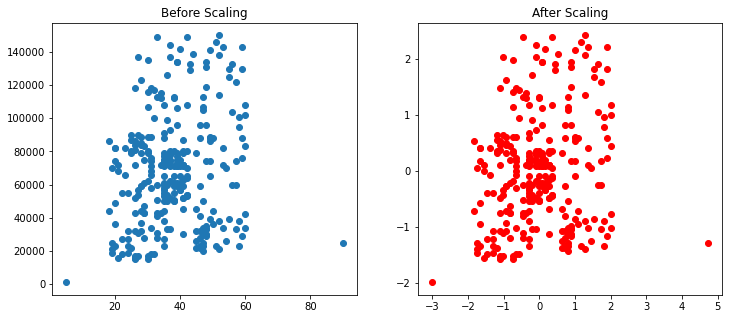

In [86]:
fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize = (12,5))

ax1.scatter(x = X_train['Age'] , y =X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(x= X_train_scaled_out['Age'] , y = X_train_scaled_out['EstimatedSalary'] ,color = 'red')
ax2.set_title("After Scaling")
plt.show()

***Still seeing the outliers , the impact has not been removed, so be careful when applying standardization in outlier columns.***

## When to use Standardization?

<img src = "feature_scaling.jpg" width = 500 height = 340>
<img src = "reseons_scaling.png" width = 500 height = 340>